### Claude Shyaka
### ID#: 801326243

# Homework 4: SVM and SVR Models

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC, SVR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics

# Seed for random state
seed = 42

### Problem 1

In [553]:
# Load the cancer dataset into a pandas dataframe
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target
labels = np.reshape(breast_cancer_labels, (569,1))
final_breast_cancer_data = np.concatenate([breast_cancer_data, labels], axis=1)
breast_cancer_dataset = pd.DataFrame(final_breast_cancer_data)

# Add feature names to the dataframe
features = breast_cancer.feature_names
features_labels = np.append(features, 'label')
breast_cancer_dataset.columns = features_labels

# Replace labels names
breast_cancer_dataset['label'].replace(0, 'Benign', inplace=True)
breast_cancer_dataset['label'].replace(1, 'Malignant', inplace=True)

# Rename labels
breast_cancer_dataset['label'].replace('Benign', 0, inplace=True)
breast_cancer_dataset['label'].replace('Malignant', 1, inplace=True)

# Preview of the dataset
breast_cancer_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [554]:
# Load features and labels
X = breast_cancer_dataset.iloc[:, :30].values
Y = breast_cancer_dataset.iloc[:, 30].values

# Create a scaler object
# Fit the scaler on the training data and transform
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [555]:
def OptimalRegularizationStrength(kernel, C_array):
    # Split the data into training and test set.
    # Train set is 80% of the data and the test set is 20%
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.20, train_size=0.80, random_state=seed)

    acc_list = []
    prec_list = []
    rec_list = []
    for c in C_array:
        # Linear support vector classifier
        clf = SVC(kernel=kernel, C=c)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
        prec_list.append(metrics.precision_score(Y_test, Y_pred))
        rec_list.append(metrics.recall_score(Y_test, Y_pred))

    plt.plot(C_array, acc_list, label="Accuracy")
    plt.plot(C_array, prec_list, label="Precision")
    plt.plot(C_array, rec_list, label="Recall")
    plt.xlabel("C")
    plt.title(kernel.capitalize() + " kernel\nAccuracy, Precision, and Recall over a different number of Cs")
    plt.legend()
    plt.show()


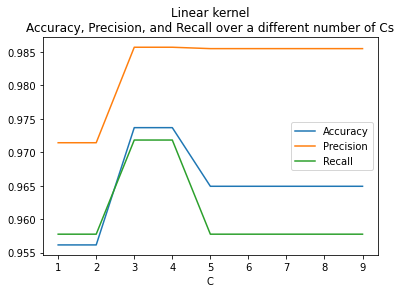

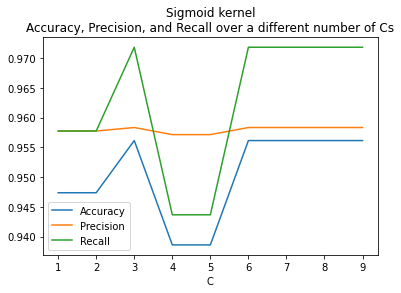

In [556]:
# Extract the optimal regularization strength
C_array = np.arange(1., 10., 1)
OptimalRegularizationStrength("linear", C_array=C_array)
OptimalRegularizationStrength("sigmoid", C_array=C_array)

In [557]:
def TrainSVCWithPCA(X, Y, n_trainings, kernel, seed):
    '''
    Using PCA feature extraction.
    Training a Classifier n_trainings independent times. 
    '''
    acc_list = []
    prec_list = []
    rec_list = []
    K_vals = list(range(1, n_trainings))
    for k in K_vals:

        pca = PCA(n_components=k)
        principalComponents = pca.fit_transform(X)

        # Split the data into training and test set.
        # Train set is 80% of the data and the test set is 20%
        X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, train_size=0.80, random_state=seed)

        # Linear support vector classifier
        clf = SVC(kernel=kernel, C=3)

        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
        prec_list.append(metrics.precision_score(Y_test, Y_pred))
        rec_list.append(metrics.recall_score(Y_test, Y_pred))

    plt.plot(K_vals, acc_list, label="Accuracy")
    # plt.plot(K_vals, prec_list, label="Precision")
    # plt.plot(K_vals, rec_list, label="Recall")
    plt.xlabel("K")
    plt.title(kernel.capitalize() + " kernel\nAccuracy, Precision, and Recall over a different number of Ks")
    plt.legend()
    plt.show()


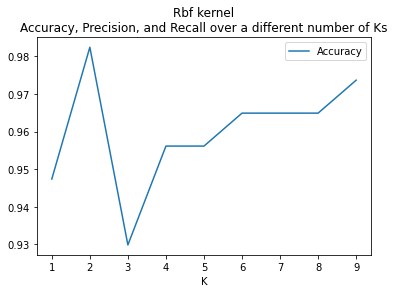

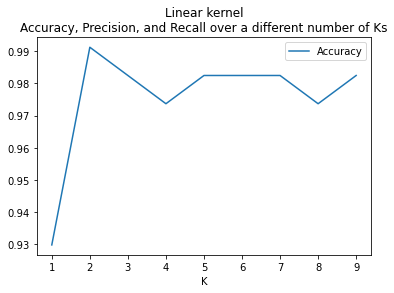

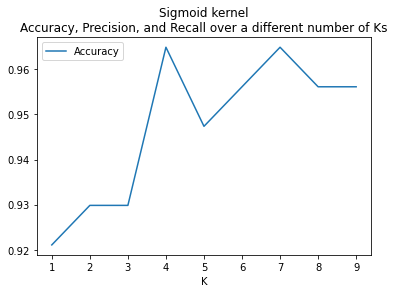

In [558]:
TrainSVCWithPCA(X_scaled, Y, 10, "rbf", seed)
TrainSVCWithPCA(X_scaled, Y, 10, "linear", seed)
TrainSVCWithPCA(X_scaled, Y, 10, "sigmoid", seed)

### Problem 2

In [559]:
# Load housing dataset
housing_dataset = pd.read_csv('./data/Housing.csv', delimiter=',')

# Prepare the dataset.

# List of variable to map to numerical values.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing_dataset[varlist] = housing_dataset[varlist].apply(binary_map)

# preview the dataset
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [560]:
# Extract the desired features
filter = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing_filtered = housing_dataset[filter]
housing_filtered.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,7420,4,2,3,1,0,0,0,1,2,1,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,11410000


In [561]:
# array of data
data = housing_filtered.values


In [562]:
# Train SVR models without using PCA
def TrainSVRModel(data, kernel, C=1., gamma='scale', degree=3):

    # Split the data in train and test set
    data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=seed)

    # Apply the MinMaxScaler to the Datasets
    sc = MinMaxScaler()
    data_train_scaled = sc.fit_transform(data_train)
    data_test_scaled = sc.transform(data_test)

    # Get the training feature and labels
    X_train, Y_train = data_train_scaled[:, :11], data_train_scaled[:, 11]

    # Get the testing features and labels
    X_test, Y_test = data_test_scaled[:, :11], data_test_scaled[:, 11]

    # Support Vector Regression model
    clf = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    return metrics.mean_squared_error(Y_test, Y_pred)

In [563]:
# Train LR to compare with the SVR results
def TrainLRModels(data):

    # Split the data in train and test set
    data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=seed)

    # Apply the MinMaxScaler to the Datasets
    sc = MinMaxScaler()
    data_train_scaled = sc.fit_transform(data_train)
    data_test_scaled = sc.transform(data_test)

    # Get the training feature and labels
    X_train, Y_train = data_train_scaled[:, :11], data_train_scaled[:, 11]

    # Get the testing features and labels
    X_test, Y_test = data_test_scaled[:, :11], data_test_scaled[:, 11]

    # Ridge regression model
    clf = Ridge(alpha=5)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    return metrics.mean_squared_error(Y_test, Y_pred)

In [564]:
svr_mean_squared_error = TrainSVRModel(data, "rbf", C=1e1, gamma=0.01)
print("Mean Squared Error from SVR Model:", svr_mean_squared_error)
ridge_mean_squared_error = TrainLRModels(data)
print("Mean Squared Error from Ridge Model:", ridge_mean_squared_error)
print("Percent difference btn SVR and Ridge:", np.abs((svr_mean_squared_error-ridge_mean_squared_error)/ridge_mean_squared_error)*100)

Mean Squared Error from SVR Model: 0.015616332188484048
Mean Squared Error from Ridge Model: 0.01712989577799997
Percent difference btn SVR and Ridge: 8.835801508260198


In [565]:
def TrainSVRWithPCA(data, n_trainings, seed, kernel, C=1., gamma='scale', degree=3):
    '''
    Using PCA feature extraction.
    Training a Classifier n_trainings independent times. 
    '''

    # Apply the MinMaxScaler to the Datasets
    sc = MinMaxScaler()
    data_scaled = sc.fit_transform(data)

    X = data_scaled[:, :11]
    Y = data_scaled[:, 11]

    msr_list = []
    K_vals = list(range(1, n_trainings+1))
    for k in K_vals:

        pca = PCA(n_components=k)
        principalComponents = pca.fit_transform(X)

        # Split the data into training and test set.
        # Train set is 80% of the data and the test set is 20%
        X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, train_size=0.80, random_state=seed)

        # Linear support vector classifier
        clf = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        msr_list.append(metrics.mean_squared_error(Y_test, Y_pred))

    print(msr_list)
    plt.plot(K_vals, msr_list, label="Mean Squared Error")
    plt.xlabel("K")
    plt.title(kernel.capitalize() + " kernel\nAccuracy, Precision, and Recall over a different number of Ks")
    plt.legend()
    plt.show()


[0.028334749587309756, 0.02230060283254324, 0.02151602702162489, 0.019449174576847306, 0.018158674284873277, 0.0155614004717577, 0.014974070732223316, 0.014601099542143866, 0.013769637560242055, 0.012994006287783667, 0.013197250125136437]


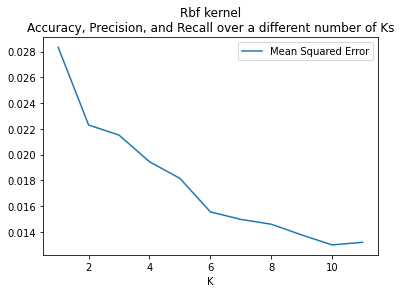

In [566]:
TrainSVRWithPCA(data, 11, seed, 'rbf', C=1e2, gamma=0.01)

[0.028853091907576425, 0.023042992860418995, 0.02230888897810273, 0.021183322681045152, 0.02120595889721283, 0.015255180589896434, 0.015266543705330132, 0.015217996148571642, 0.01420399979516002, 0.013417311500902949, 0.013657262359738314]


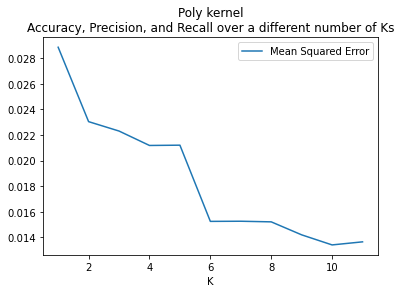

[0.028853306331011675, 0.023060453302576653, 0.02231497700848698, 0.02117330983035205, 0.021182513633151913, 0.015257263643411893, 0.015267875787628506, 0.015225004445806992, 0.014197900443051577, 0.013415523542261968, 0.01364730755661225]


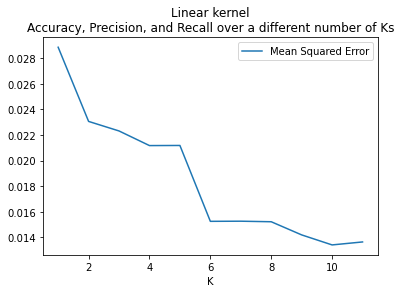

In [567]:
TrainSVRWithPCA(data, 11, seed, 'poly', C=1e2, degree=1)
TrainSVRWithPCA(data, 11, seed, 'linear', C=1e2)